In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns



######################################### DATA ################################################################
men_weight = np.random.normal(loc=80, scale=10, size=500)
men_height = np.random.normal(loc=176, scale=10, size=500)

women_weight = np.random.normal(loc=60, scale=5, size=500)
women_height = np.random.normal(loc=166, scale=10, size=500)

men = np.ones(500)
women = np.zeros(500)

men_end = np.hstack([men_weight.reshape(-1, 1), men_height.reshape(-1, 1), men.reshape(-1, 1)])
women_end = np.hstack([women_weight.reshape(-1, 1), women_height.reshape(-1, 1), women.reshape(-1, 1)])

X = np.vstack([men_end, women_end])

np.random.shuffle(X)

df = pd.DataFrame(X, columns=['weight', 'height', 'sex'])
###############################################################################################################

In [2]:
df.head()

,weight,height,sex
0,62.342174,172.366766,0.0
1,50.689595,177.012930,0.0
2,65.672045,169.260695,0.0
3,99.251478,183.536182,1.0
4,79.032113,165.801651,1.0


In [2]:
x = df.iloc[::, :-1]
x_0, x_1 = df.iloc[::, 0], df.iloc[::, 1]
y = df.iloc[::, -1]

shapiro test | Feature_0 -> stat: 0.952 p_value: 0.000
shapiro test | Feature_1 -> stat: 0.998 p_value: 0.349
Features_0 are not normal

Features_1 are normal

Feature 0: histogram


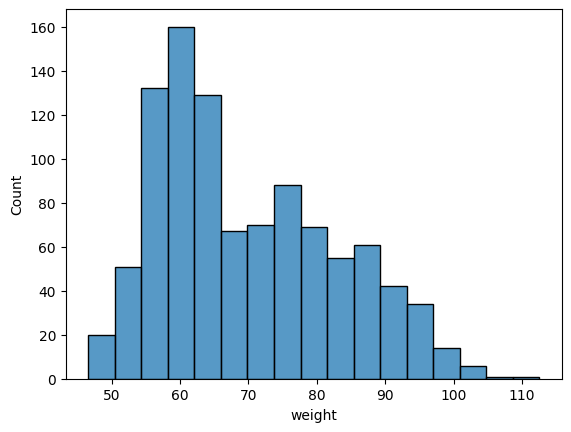

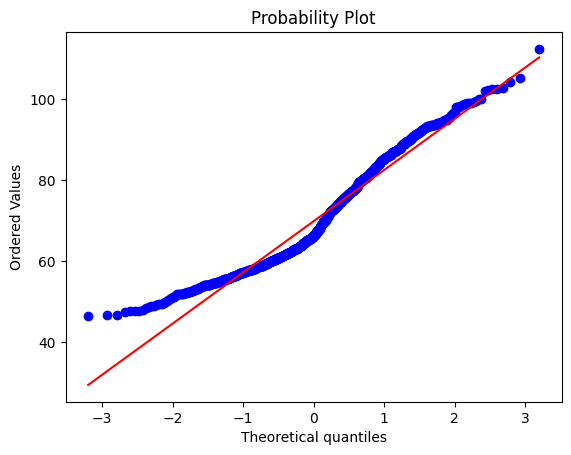

----------------------------------------------------------------------------------------------------
Feature 1: histogram


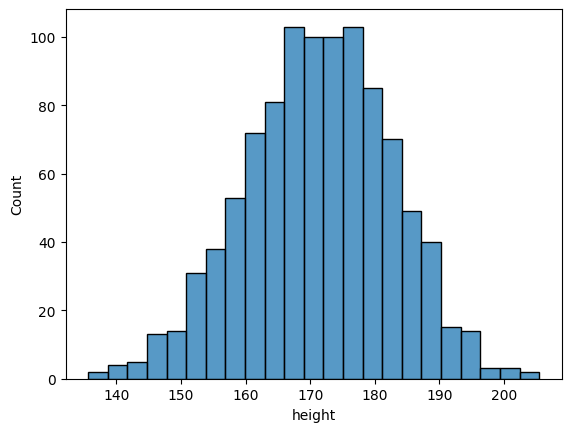

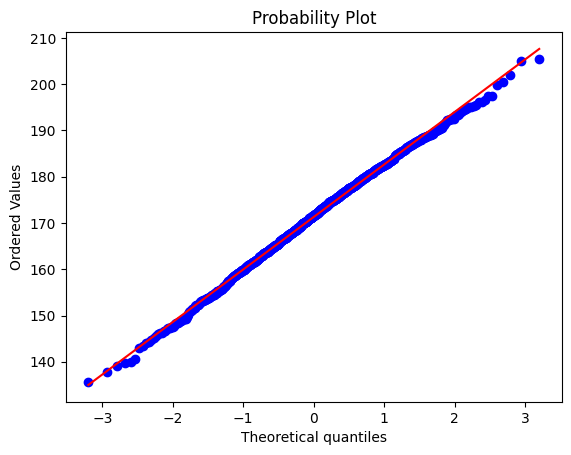

In [7]:
####### SHAPRO TEST


stat_feature_0, p_feature_0 = sc.stats.shapiro(x.iloc[::, 0])
stat_feature_1, p_feature_1 = sc.stats.shapiro(x.iloc[::, 1])

print(f'shapiro test | Feature_0 -> stat: {stat_feature_0:.3f} p_value: {p_feature_0:.3f}')
print(f'shapiro test | Feature_1 -> stat: {stat_feature_1:.3f} p_value: {p_feature_1:.3f}')


if p_feature_0 < 0.05:
    print('Features_0 are not normal')
else:
    print('Features_0 are normal')
    
print()

if p_feature_1 < 0.05:
    print('Features_1 are not normal')
else:
    print('Features_1 are normal')
    
print()
print('Feature 0: histogram')   
sns.histplot(x.iloc[::, 0])    
plt.show()


sc.stats.probplot(x.iloc[::, 0], dist='norm', plot=plt)
plt.show()
print('-' * 100)

print('Feature 1: histogram')   
sns.histplot(x.iloc[::, 1])    
plt.show()


sc.stats.probplot(x.iloc[::, 1], dist='norm', plot=plt)
plt.show()

-----

In [37]:
############# K2 Д'Агостино 
 
st, p_value = sc.stats.normaltest(df.iloc[::, 0])    

if p_value < 0.05:
    print(f'Feature -> {0}  are not mormal| {p_value:.3f}')       
else:
    print(f'Feature -> {0}  are mormal    | {p_value:.3f}')

Feature -> 0  are not mormal| 0.000


In [9]:
np.random.seed(1)
x, y = sk.datasets.make_regression(n_samples=10, n_features=10, n_informative=5, noise=0.4, random_state=1)

make_r = pd.DataFrame(x)

In [10]:
s, p = sc.stats.normaltest(make_r)

C:\python310\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [12]:
for index, p_value in enumerate(p):
    if p_value < 0.05:
        print(f'  NOT NORMAL     Feature -> {index}  |  p_value {p_value:.2f}')
    else:
        print(f'  NORMAL     Feature -> {index}  |  p_value {p_value:.2f}')

  NORMAL     Feature -> 0  |  p_value 0.82
  NORMAL     Feature -> 1  |  p_value 0.81
  NORMAL     Feature -> 2  |  p_value 0.62
  NORMAL     Feature -> 3  |  p_value 0.48
  NORMAL     Feature -> 4  |  p_value 0.76
  NORMAL     Feature -> 5  |  p_value 0.80
  NOT NORMAL     Feature -> 6  |  p_value 0.00
  NORMAL     Feature -> 7  |  p_value 0.09
  NORMAL     Feature -> 8  |  p_value 0.48
  NORMAL     Feature -> 9  |  p_value 0.45


--------------

In [78]:
################ Тест Андерсона-Дарлінга ##############

result = sc.stats.anderson(x.iloc[::, 1])

print(f' stat {result.statistic:.3f}')

print(f' crirical {result.critical_values}')

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Gaussian', sl)
    else:
        print('Not Gaussian', sl)

 stat 0.152
 crirical [0.574 0.653 0.784 0.914 1.088]
Gaussian 15.0
Gaussian 10.0
Gaussian 5.0
Gaussian 2.5
Gaussian 1.0


In [79]:
#######################################################

-----

In [82]:
############### Pearsons correlation coefficient

stat, p = sc.stats.pearsonr(x.iloc[::, 0], x.iloc[::, 1])

print(f'stat : {stat:.3f} | p_value: {p:.3f}')

if p < 0.05:
    print('Dependent')
else:
    print('Independent')

stat : 0.366 | p_value: 0.000
Dependent


In [83]:
############### Spirmen correlation coefficient

stat, p = sc.stats.spearmanr(x.iloc[::, 0], x.iloc[::, 1])

print(f'stat : {stat:.3f} | p_value: {p:.3f}')

if p < 0.05:
    print('Dependent')
else:
    print('Independent')

stat : 0.376 | p_value: 0.000
Dependent


----------------------------------------------

In [88]:
################# Chi-squre correlation coef

stat, p, dof, expected = sc.stats.chi2_contingency(x.values)

print(f'stat : {stat:.3f} | p_value: {p:.3f}')

if p < 0.05:
    print('Dependent')
else:
    print('Independent')

stat : 1416.234 | p_value: 0.000
Dependent


-----------------------------------

In [18]:
###################### Example of the Augmented Dickey-Fuller unit root test

from statsmodels.tsa.stattools import adfuller



DF = pd.DataFrame(np.random.normal(loc=80, scale=10, size=30), index=pd.date_range(start='2025-01-01', periods=30, freq='D'))

stat, p, lags, ods, crit, y = adfuller(DF.index)

if p < 0.05:
    print('Probably not Stationary')
else:
    print('Probably Stationary')

Probably Stationary


In [20]:
######################## # Example of the Kwiatkowski-Phillips-Schmidt-Shin test

from statsmodels.tsa.stattools import kpss


stat, p, lags, crit = kpss(DF)

print(f'stat: {stat} | p_value: {p}')

if p < 0.05:
    print("Probably Stationary")
else:
    print("not Stationary")

stat: 0.07548436905128404 | p_value: 0.1
not Stationary


C:\python310\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [5]:
################################ Student's T-test

from scipy.stats import ttest_ind

stat, p = ttest_ind(x_0, x_1)

###### t = (x_0.mean() - x_1.mean()) / np.sqrt((np.var(x_0) / x_0.shape[0]) + (np.var(x_1) / x_1.shape[0]))

print(f'stat: {stat} | p_value: {p}')
if p < 0.05:
    print('Not Same')
else:
    print('Same')

stat: -189.85736756361675 | p_value: 0.0
Not Same


In [47]:
mean_x0 = x_0.mean()
mean_x1 = x_1.mean()

var_0 = np.var(x_0)
var_1 = np.var(x_1)

n_0 = len(x_0)
n_1 = len(x_1)

t_test = (mean_x0 - mean_x1) / np.sqrt((var_0 / n_0) + (var_1 / n_1))

# degree of freedom
df = n_0 + n_1 - 2

p_value = 2 * (1 - sc.stats.t.cdf(abs(t_test), df=df))

print(f't-test :  {t_test}')
print(f'p_value:  {p_value}') 

if p_value < 0.05:
    print('Features means differ')
else:
    print('Features of the average values do not differ')

t-test :  -186.42140039423313
p_value:  0.0
Features means differ


In [6]:
############################# Example of the Paired Student's t-test

from scipy.stats import ttest_rel

stat, p = ttest_rel(x_0, x_1)

print(f'stat: {stat} | p_value {p}')

if p < 0.05:
    print('Features means differ')
else:
    print('Features of the average values do not differ')

stat: -229.4617103567349 | p_value 0.0
Features means differ


----------------

In [18]:
men_x, women_x = df['height'][df['sex'] == 1], df['height'][df['sex'] == 0]

In [22]:
################### Example of the analysis of variation test

from scipy.stats import f_oneway

stat, p = f_oneway(men_x, women_x)

print(f'stat: {stat:.3f} | p_value: {p:.3f}')

if p < 0.05:
    print('The average value is different')
else:
    print('the average value is not different')

stat: 227.103 | p_value: 0.000
The average value is different


----------

In [31]:
import numpy as np
import seaborn as sns
import pandas as pd
import scipy as sc
import sklearn as sk
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import ttest_1samp
# This function returns two values. The first one is the t statistic # and the second one is p-value

statistic,p_value = ttest_1samp([4,6,2,3,7],5)

# We considered 5 here because 50% of each sample would be 5. As we # have 5 samples, total would turnout to be 25.

print("The P-value is:",p_value)

if p_value <= 0.05:
    print("The hypothesis is rejected")
else:
    print("Your friend's claim is true! Unable to reject null hypothesis")

The P-value is: 0.5528894339334173
Your friend's claim is true! Unable to reject null hypothesis


In [16]:
field_1, field_2 = np.array([69,56,84,63,34,45,73,65]), np.array([46,34,23,56,42,54,32,49])

stat, p_value = sc.stats.ttest_ind(field_1, field_2)

print(f'P_value is: {p_value}')

if p_value <= 0.05:
    print('We reject the null hypothesis. There is a difference between the yield of two field')
else:
    print('We fail to reject the null hypothesis. There is no difference between the yield of two fields')
    
    

P_value is: 0.015464452955301845
We reject the null hypothesis. There is a difference between the yield of two field


In [30]:
import numpy as np
import scipy.stats as stats

# Выборка весов яблок (граммы)
weights = np.array([152, 148, 149, 151, 150, 153, 154, 147, 149, 150])

# Гипотетическое среднее (H₀: μ = 150 г)
mu_0 = 150

# Одновыборочный t-тест
t_stat, p_value = stats.ttest_1samp(weights, mu_0)

# Выводим результат
print(f"t-статистика: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f'Diff {(weight.mean() - mu_0):.3f}')

t-статистика: 0.4286
P-value: 0.6783
Diff 2.499


Если p-value > 0.05, значит разница незначима – просто случайность.


Если p-value < 0.05, значит разница реальная.

-----

In [34]:
dataset = sns.load_dataset('tips')

print(dataset.shape)
dataset.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [46]:
sex_smoker = pd.crosstab(dataset['sex'], dataset['smoker']) 

In [47]:
sex_smoker

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [66]:
val = sc.stats.chi2_contingency(sex_smoker)

val

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]]))

In [63]:
degrees_of_freedom, expected_values = val[2],val[3]

print("Degrees of freedom:",degrees_of_freedom , "\nExpected values:",expected_values)

observed_values = sex_smoker.values

Degrees of freedom: 1 
Expected values: [[59.84016393 97.15983607]
 [33.15983607 53.84016393]]


In [65]:
from scipy.stats import chi2

chi_square = sum([(o-e)**2./e for o,e in zip(observed_values,expected_values)])
chi_square_statistic = chi_square[0]+chi_square[1]

print('Chi-square test statistic is:',chi_square_statistic)

Chi-square test statistic is: 0.001934818536627623


In [80]:
alpha = 0.05

print(alpha)
print(degrees_of_freedom)

0.05
1


In [79]:
critical_value = sc.stats.chi2.ppf(q=1-alpha, df=degrees_of_freedom)

print('critical_values', critical_value)

critical_values 3.841458820694124


In [82]:
if chi_square_statistic >= critical_value:
    print("Reject null hypothesis,There is a relationship between 2 categorical variables")
else:
    print("Retain null hypothesis,There is no relationship between 2 categorical variables")

Retain null hypothesis,There is no relationship between 2 categorical variables


---

In [84]:
men = np.array([175, 180, 178, 172, 177])
women = np.array([165, 168, 162, 170, 166])

if the p value is greater than 0.05 then the data is normally distributed

In [86]:
st, p = sc.stats.shapiro(men)

print(p)

0.9402930310129849


-----------

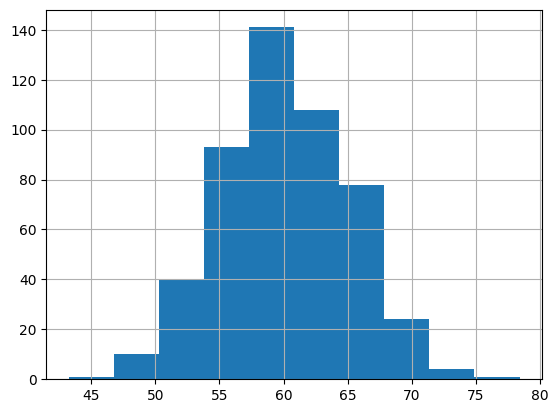

In [10]:
df['weight'][df['sex'] == 0].hist()
plt.show()

In [14]:
weight_women_mean = np.mean(df['weight'][df['sex'] == 0])
weight_man_mean = np.mean(df['weight'][df['sex'] == 1])
height_women_mean = np.mean(df['height'][df['sex'] == 0])
height_man_mean = np.mean(df['height'][df['sex'] == 1])

print(height_women_mean)
print(weight_women_mean)
print('mans')
print(weight_man_mean)
print(height_man_mean)

165.8141036995436
60.11823988250349
mans
79.39960126716761
176.28663217108803


In [18]:
df.groupby('sex').mean().T

sex,0.0,1.0
weight,60.118240,79.399601
height,165.814104,176.286632


-------------------

----------------------

In [ ]:
import scipy.stats as sc

class HypoTest:
    
    def __init__(self, df_1=None):
        self.df_1 = df_1
    
    def normals_test(self, df_1=None):
        
        if df_1 is not None:
            self.df_1 = df_1
        
        if self.df_1 is None:
            raise ValueError("DataFrame not passed to class or method!")
            
        feature_names = df.columns
        
        for i in range(len(feature_names)):
            
            column_data = self.df_1.iloc[::, i]
            
            # Shapiro-Wilk test
            stat_0, p_0 = sc.shapiro(column_data)

            # D'Agostino and Pearson’s test
            stat_1, p_1 = sc.normaltest(column_data)

            # Anderson-Darling test
            stat_2, critical_values, significance_levels = sc.anderson(column_data)
            
            print(f"\n### Feature -> | {feature_names[i]} | ###")
            print(f"Shapiro-Wilk test: stat={stat_0:.4f} | p-value={p_0:.4f}")
            print(f"D’Agostino K^2 test: stat={stat_1:.4f} | p-value={p_1:.4f}")
            print(f"Anderson-Darling test: statistic={stat_2:.4f}")
            print(f"Critical values: {critical_values}")
            print(f"Significance levels: {significance_levels}")
            
            
    @classmethod
    def correlation(cls, df_1=None):
        
        if self.df_1 is None:
            self.df_1 = df_1
        
        feature_names = self.df_1.columns
        
        for i in range(len(feature_names)):
            for j in range(i + 1, len(feature_names)):
                
                stat, p_value = sc.stats.pearsonr(df.iloc[::, i], df.iloc[::, j])
                
                print('Pearson’s Correlation Coefficient')
                print(f" Feature: {feature_names[i]} Feature: {feature_names[j]} stat: {stat:.3f} p_value: {p_value:.3f}")
                if p_value > 0.05:
                    print('Probably independent', "\n")
                else:
                    print('Dependent', "\n")
                print(40 * '-')
                print('if p_value > 0.05 Correlation is significance')
                
                
        
        



HypoTest.correlation(df)

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import scipy as sc

In [29]:
df = pd.read_csv('train_2.csv', index_col=0)
df.corr()

,Survived,Pclass,Fare,Age,Sex
Survived,1.000000,-0.338481,0.257307,-0.069811,-0.543351
Pclass,-0.338481,1.000000,-0.549500,-0.331334,0.131900
Fare,0.257307,-0.549500,1.000000,0.091563,-0.182333
Age,-0.069811,-0.331334,0.091563,1.000000,0.084155
Sex,-0.543351,0.131900,-0.182333,0.084155,1.000000


In [30]:
pd.crosstab(df['Sex'], df['Pclass']) 

Pclass,1,2,3
Sex,,,
0,94,76,144
1,122,108,347


----------

In [32]:
data = df.copy()

In [33]:
for i in range(data.shape[1]):
    
    stat, p_value = sc.stats.shapiro(data.iloc[::, i])

    print(f'stat: {stat:.3f}, p_value: {p_value:.3f}')

    if p_value < 0.05:
        print('The distribution has deviations', '\n')
    else:
        print('Distribution is normal', '\n')

stat: 0.617, p_value: 0.000
The distribution has deviations 

stat: 0.718, p_value: 0.000
The distribution has deviations 

stat: 0.522, p_value: 0.000
The distribution has deviations 

stat: 0.959, p_value: 0.000
The distribution has deviations 

stat: 0.604, p_value: 0.000
The distribution has deviations 



In [34]:
for i in range(data.shape[1]):
    
    stat, p_value = sc.stats.normaltest(data.iloc[::, i])

    print(f'stat: {stat:.3f}, p_value: {p_value:.3f}')

    if p_value < 0.05:
        print('The distribution has deviations', '\n')
    else:
        print('Distribution is normal', '\n')

stat: 4070.917, p_value: 0.000
The distribution has deviations 

stat: 1437.109, p_value: 0.000
The distribution has deviations 

stat: 904.587, p_value: 0.000
The distribution has deviations 

stat: 43.854, p_value: 0.000
The distribution has deviations 

stat: 4976.485, p_value: 0.000
The distribution has deviations 



In [35]:

for i in range(data.shape[1]):
    
    result = sc.stats.anderson(data.iloc[::, i])

    print('data: ', data.columns[i], '|  stat=%.3f' % (result.statistic))

    for i in range(len(result.critical_values)):
    
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < cv:
            print('Probably Gaussian at the %.1f%% level' % (sl), '\n')
        else:
            print('Probably not Gaussian at the %.1f%% level' % (sl), '\n')

data:  Survived |  stat=171.470
Probably not Gaussian at the 15.0% level 

Probably not Gaussian at the 10.0% level 

Probably not Gaussian at the 5.0% level 

Probably not Gaussian at the 2.5% level 

Probably not Gaussian at the 1.0% level 

data:  Pclass |  stat=110.116
Probably not Gaussian at the 15.0% level 

Probably not Gaussian at the 10.0% level 

Probably not Gaussian at the 5.0% level 

Probably not Gaussian at the 2.5% level 

Probably not Gaussian at the 1.0% level 

data:  Fare |  stat=122.170
Probably not Gaussian at the 15.0% level 

Probably not Gaussian at the 10.0% level 

Probably not Gaussian at the 5.0% level 

Probably not Gaussian at the 2.5% level 

Probably not Gaussian at the 1.0% level 

data:  Age |  stat=15.317
Probably not Gaussian at the 15.0% level 

Probably not Gaussian at the 10.0% level 

Probably not Gaussian at the 5.0% level 

Probably not Gaussian at the 2.5% level 

Probably not Gaussian at the 1.0% level 

data:  Sex |  stat=178.600
Probably 

-------------------------------------------------------------------------------------

In [28]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()

data_scale = min_max.fit_transform(data)

In [29]:
data_new = pd.DataFrame(data_scale, columns=data.columns)

In [36]:
stat, p = sc.stats.pearsonr(data_new['Fare'], data_new['Age'])

print(f'stat: {stat:.3f} p: {p:.3f}')

if p < 0.05:
    print('Probably correlated')
else:
    print('Probably not correlated')

stat: 0.092 p: 0.006
Probably correlated


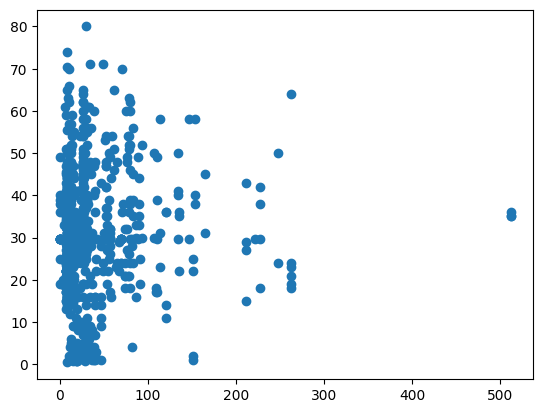

In [34]:
plt.scatter(data['Fare'], data['Age'])
plt.show()

In [40]:
np.corrcoef(data_new['Fare'], data_new['Age'])


array([[1.        , 0.09156336],
       [0.09156336, 1.        ]])

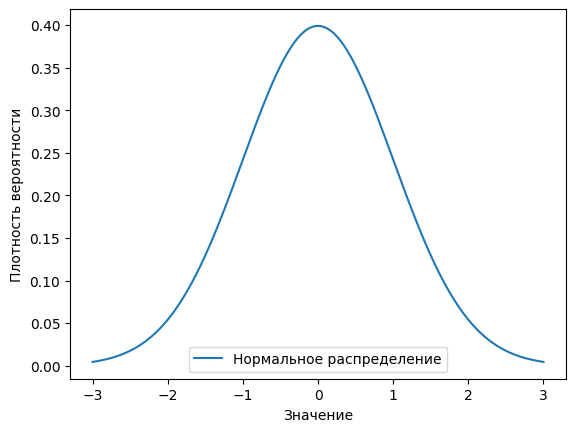

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x_1 = np.linspace(-3, 3, 1000)  # Диапазон значений
x_2 = np.linspace(-6, 6, 1000)
pdf = norm.pdf(x_1, loc=0, scale=1)  # Функция плотности нормального распределения

plt.plot(x_1, pdf, label="Нормальное распределение")
plt.xlabel("Значение")
plt.ylabel("Плотность вероятности")
plt.legend()
plt.show()


In [49]:
import numpy as np
from scipy.stats import norm

# Данные
mu_0 = 170  # Средний рост в прошлом
sample_mean = 172  # Новое среднее значение
std = 5  # Стандартное отклонение
n = 100  # Размер выборки

# Z-статистика
z_stat = (sample_mean - mu_0) / (std / np.sqrt(n))

# Критическое значение
alpha = 0.05
z_critical = norm.ppf(1 - alpha/2)  # Двусторонний тест

print(f"Z-статистика: {z_stat:.4f}")
print(f"Критическое значение: ±{z_critical:.4f}")

# Проверяем гипотезу
if abs(z_stat) > z_critical:
    print("Отклоняем H₀: Средний рост изменился!")
else:
    print("Не отклоняем H₀: Средний рост не изменился.")


Z-статистика: 4.0000
Критическое значение: ±1.9600
Отклоняем H₀: Средний рост изменился!


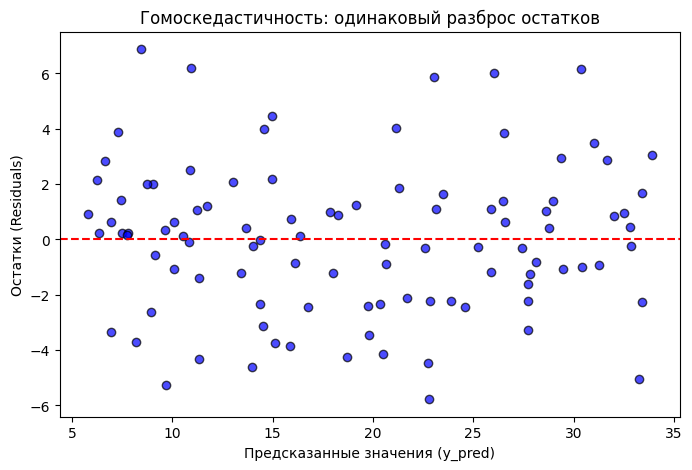

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Генерируем данные с гомоскедастичностью
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3 * X.squeeze() + 5 + np.random.normal(0, 3, 100)  # Ошибка с постоянной дисперсией

# Обучаем модель
model = LinearRegression()
model.fit(X, y)

# Предсказания
y_pred = model.predict(X)

# Остатки
residuals = y - y_pred

# Визуализация остатков
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.7, color='blue', edgecolors='k')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
plt.xlabel("Предсказанные значения (y_pred)")
plt.ylabel("Остатки (Residuals)")
plt.title("Гомоскедастичность: одинаковый разброс остатков")
plt.show()


----

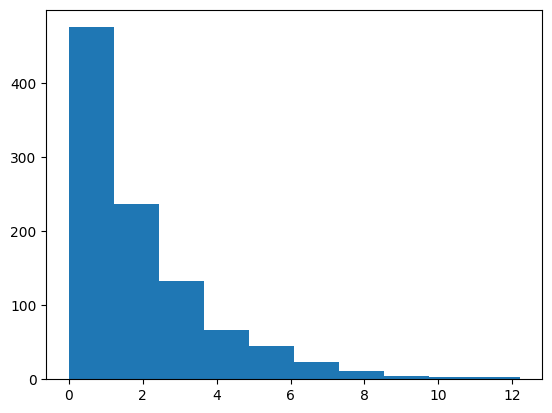

In [7]:
#### method Box - Cox
import numpy as np
import scipy as sc
from sklearn.preprocessing import M

abnormal_data = np.random.exponential(scale=2, size=1000)

plt.hist(abnormal_data)
plt.show()

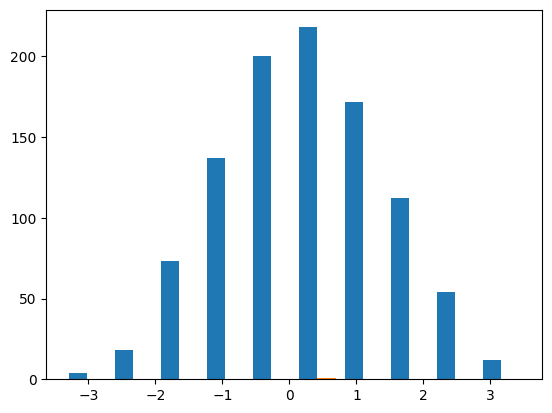

In [8]:
data_box_cox = sc.stats.boxcox(abnormal_data)

plt.hist(data_box_cox)
plt.show()

----------------

In [1]:
import scipy as sc
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
x, y = sk.datasets.make_classification(n_samples=100, n_features=2,
                                       n_classes=2, n_clusters_per_class=1, 
                                      n_informative=1, n_redundant=0, n_repeated=0,
                                       random_state=1, weights=[0.3, 0.7])

In [18]:
binom = np.random.binomial()

TypeError: binomial() got an unexpected keyword argument 'k'

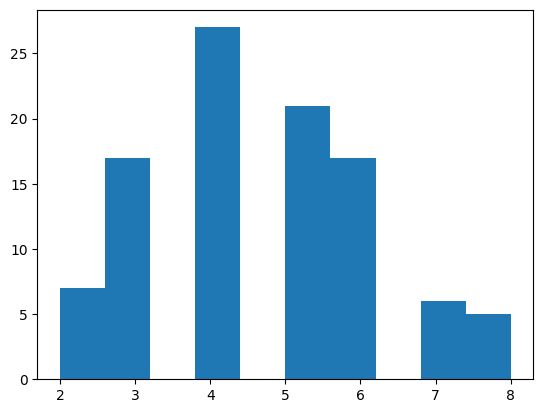

In [17]:
plt.hist(binom)
plt.show()